In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential
from sklearn.model_selection import train_test_split

from traffic import load_data as ld

In [2]:
images, labels = ld('../gtsrb/')
num_classes = 43

x_train, x_test, y_train, y_test = train_test_split(
    np.array(images), np.array(labels), test_size=0.3
)

""" Standardize the data """
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [3]:
# Dropout

model_1 = Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(50, 50, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model_1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [4]:
epochs = 12
history = model_1.fit(
    x_train, y_train, 
    validation_data=(x_test, y_test), 
    epochs=epochs
)

Epoch 1/12


2022-11-16 17:51:17.841309: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


583/583 [==============================] - 19s 31ms/step - loss: 1.5779 - accuracy: 0.5554 - val_loss: 0.3492 - val_accuracy: 0.9049
Epoch 2/12
583/583 [==============================] - 19s 32ms/step - loss: 0.2645 - accuracy: 0.9190 - val_loss: 0.1218 - val_accuracy: 0.9722
Epoch 3/12
583/583 [==============================] - 19s 33ms/step - loss: 0.1357 - accuracy: 0.9589 - val_loss: 0.0743 - val_accuracy: 0.9801
Epoch 4/12
583/583 [==============================] - 19s 32ms/step - loss: 0.0909 - accuracy: 0.9720 - val_loss: 0.0561 - val_accuracy: 0.9867
Epoch 5/12
583/583 [==============================] - 19s 33ms/step - loss: 0.0729 - accuracy: 0.9779 - val_loss: 0.0693 - val_accuracy: 0.9827
Epoch 6/12
583/583 [==============================] - 19s 33ms/step - loss: 0.0565 - accuracy: 0.9828 - val_loss: 0.0489 - val_accuracy: 0.9889
Epoch 7/12
583/583 [==============================] - 19s 33ms/step - loss: 0.0425 - accuracy: 0.9866 - val_loss: 0.0513 - val_accuracy: 0.9880
Epo

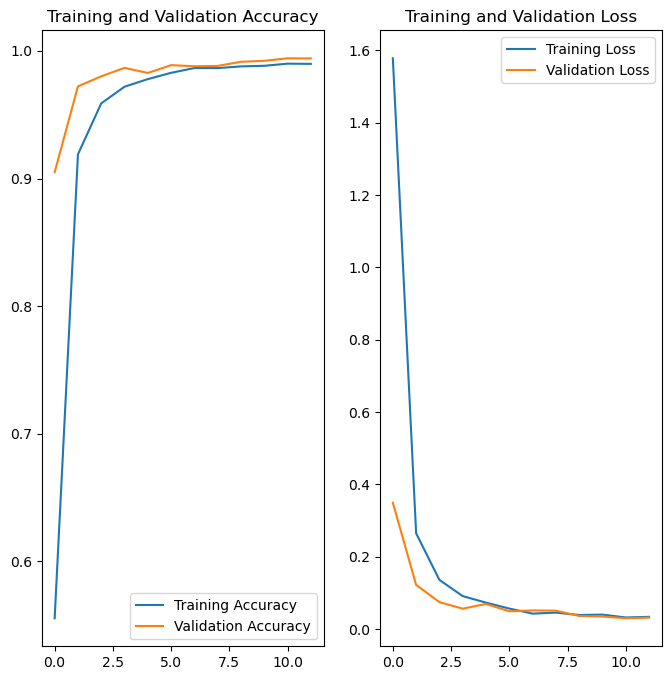

In [5]:
""" Visualize result """
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

x_train, x_test, y_train, y_test = train_test_split(
    np.array(images), np.array(labels), test_size=0.9
)

""" Standardize the data """
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
model_1.evaluate(x_test, y_test)

In [6]:
images_, labels_ = ld('../jpeg')
# ld('../jpeg/')
images_ = np.array(images_) / 255.0

1.0
0.9999999
0.90080094
1.0
0.9998841
0.98552775
0.8433738
1.0
0.99975663
0.9999956


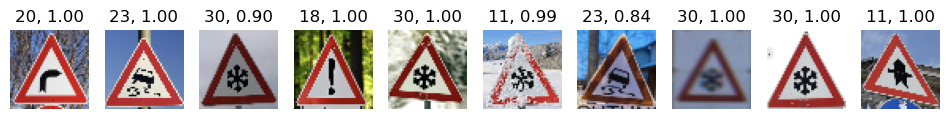

In [7]:
plt.figure(figsize=(12,12))
for i in range(len(images_)):
    plt.subplot(1, len(images_), i+1)
    plt.imshow(images_[i])
    plt.axis("off")
    predictions = model_1(tf.expand_dims(images_[i], 0))
    plt.title("{}, {}".format(np.where(predictions == np.max(predictions))[1][0], '%.2f'%np.max(predictions)))
    # plt.title((np.where(predictions == np.max(predictions))[1][0]))
    # print(np.where(predictions == np.max(predictions))[1][0])
    print(np.max(predictions))

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(1, 2, 1)
plt.imshow(images_[1])

plt.subplot(1, 2, 2)
plt.imshow(images_[2])